Assignment 7


In [75]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

Assignment 7 by Josefin Kokkinakis and Eli Uhlin, group 30
We have both worked around 20 hours each

In [76]:
# Hyper-parameters data-loading and formatting

batch_size = 128 #specifies the number of samples used in each training iteration.
num_classes = 10 # The amount of neurons in the output layer, each corresponding to a specific class. [0,...,9]
epochs = 10 # The number of times the entire training data set is used during training.

img_rows, img_cols = 28, 28 # image dimensions.

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

#Makes sure that the input data is shaped in a way that works with the Keras framework.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


Question 1.1: See comments in the block below for explanations.

**Preprocessing**

In [77]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#pixelvalues are normalized to the range 0 to 1
x_train /= 255
x_test /= 255

#one-hot encoding, so 
#the training and test labels (categorical data variables)
#are converted to a binary matrix that can be fed to the machine learning algo
# for example [0,1,2,3] = [[1,0,0,0],
#                          [0,1,0,0]
#                          [0,0,1,0]
#                          [0,0,0,1]]

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


len(x_train) # = 60 000

60000

In [78]:
## Define model ##
model = Sequential() #allows us to build NN by stacking layers on top of each other

#converts 2D input to a 1D vector
model.add(Flatten())

#relu introduces the non-linearity property to the model
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

#softmax to get probability dist over the classes (e.g. 0 to 9)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'],)
fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.8619 - val_loss: 0.2751 - val_accuracy: 0.9212
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2368 - accuracy: 0.9305 - val_loss: 0.1943 - val_accuracy: 0.9445
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1814 - accuracy: 0.9468 - val_loss: 0.1627 - val_accuracy: 0.9523
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1478 - accuracy: 0.9570 - val_loss: 0.1468 - val_accuracy: 0.9535
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1256 - accuracy: 0.9633 - val_loss: 0.1691 - val_accuracy: 0.9451
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1093 - accuracy: 0.9671 - val_loss: 0.1148 - val_accuracy: 0.9659
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0963 - accuracy: 0.9720 - val_loss: 0.1051 - val_accuracy: 0.9678
Epoch 

Question 2: Network model, training, and changing hyper-parameters

In [79]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_59 (Flatten)        (None, 784)               0         
                                                                 
 dense_283 (Dense)           (None, 64)                50240     
                                                                 
 dense_284 (Dense)           (None, 64)                4160      
                                                                 
 dense_285 (Dense)           (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


2.1. How many layers does the network in the notebook have? How many neurons does each layer have? 
What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? 
Why do the input and output layers have the dimensions they have?

Answer:
1. Input layer: 28x28=784 input neurons. Flattening layer that converts matrix input to a vector
2. Dense layer, consists of 64 neurons
3. Dense layer, consists of 64 neurons
4. Output layer: 10 sigmoid neurons (representing the numbers 0 to 9)

There are two different activation functions here, relu and softmax.
The relu (rectified linear unit) function introduces non-linearity to the output of the previous layer. It does this by setting the negative values to 0 (whilst not changing the positive ones). Relu is easier to compute than that the sigmoid function and it greatly speeds up training. Another positive aspect of relu is that it dosen't saturate it's neurons as badly as the Sigmoid function - Sigmoid has to squish an infinite range into a finite range $[0,1]$, this makes the partial derivative with respect to a certain weight very small, leading to minimal changes in weight connected to the neuron during backpropagation. This in term leads worse results and slower convergence.

$$Relu(x) = max(0,x)$$

Softmax activation function is used to get probability distributions over the classes. It uses the output of the previous layer and transforms it into a probability distribution (and at the same time ensuring that the probabilities add up to 1). It is important here because it lets us compare the predicted probabilities from the different numbers (classes).

$$Softmax(X) = \frac{exp(x_j)}{\sum{i=1}{n}exp(x_i)} for j = 1,...,n $$ 

The total number of parameters is 55 050 (which we can see in the output of the cell above).
For the input layer every neuron represents a pixel in the input image, every image consists of 784 pixels, hense 784 input neurons.
Every neuron of the output layer represents a single class. we have 10 classes (binary digits from 0 to 9) hense we get 10 neurons.


2.2. What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function is the categorical_crossentropy. It is appropriate since we are dealing with multiple classes. It based around using one-hot category encoding value in form of 0s and 1 to the output label.

$$L_{CE}(s_1) = {-}\sum_{i=1}^{n} T_i Log(S_i)$$ 

$S$ is a vector with the actual output values. $T$ is a vector with corresponding expected value or true value. For our case only one value in the vector $T$ will be equal to 1 and the rest is 0. 
This means that categorical crossentropy only depends on $S_i$ if  $T_i = 1$. as $S_i$ approaches 1, the value of $L_{CE}$ will go to zero, and as the value of $S_i$ approaches 0 $L_{CE}$ goes to infinity

Categorical crossentropy is good for our model since we want our model to choose between 10 different classes, and the categorical crossentropy function works for an arbitrary number of classes, as opposed to the binary crossentropy function which can only put things into two categories.

2.3. Train the network for 10 epochs and plot the training and validation accuracy for each epoch

In [80]:
## Define model ##
model_2 = Sequential()

model_2.add(Flatten())

model_2.add(Dense(64, activation = 'relu'))
model_2.add(Dense(64, activation = 'relu'))

model_2.add(Dense(num_classes, activation='softmax'))


model_2.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'],)
fit_info = model_2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4822 - accuracy: 0.8632 - val_loss: 0.2476 - val_accuracy: 0.9293
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9322 - val_loss: 0.1998 - val_accuracy: 0.9401
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1813 - accuracy: 0.9471 - val_loss: 0.1838 - val_accuracy: 0.9427
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1496 - accuracy: 0.9570 - val_loss: 0.1554 - val_accuracy: 0.9526
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9636 - val_loss: 0.1306 - val_accuracy: 0.9601
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9676 - val_loss: 0.1274 - val_accuracy: 0.9615
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9713 - val_loss: 0.1027 - val_accuracy: 0.9693
Epoch 

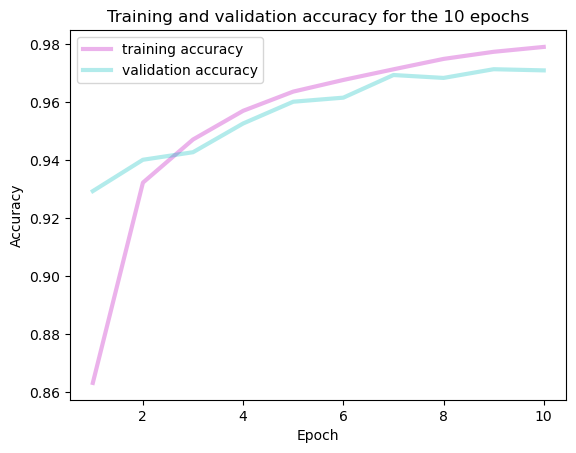

In [81]:
train_accuracy= fit_info.history['accuracy']
label_1='training accuracy'
label_2='validation accuracy'
val_accuracy= fit_info.history['val_accuracy']
x_epoch=list(range(1,11))
plt.plot(x_epoch, train_accuracy, 'm', label = label_1, linewidth=3, alpha=0.3)
plt.plot(x_epoch, val_accuracy, 'c', label = label_2, linewidth=3, alpha=0.3)
plt.legend()
plt.title('Training and validation accuracy for the 10 epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

2.4. Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights 2 (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

Answer: It is possible that amount of epochs is what gives us a result lower than Geoff Hintons since we do not know how many epochs he had. We also don't know the regularization factors between 0.000001 and 0.001 were used.

In [82]:
## Define model ##
regularization_factors=[0.001,0.0001,0.0005,0.00001,0.000001]
val_acc_0_001=[]
val_acc_0_0001=[]
val_acc_0_0005=[]
val_acc_0_00001=[]
val_acc_0_000001=[]

#regularization factor 0.001
for _ in range(3):
    model_3 = Sequential()
    model_3.add(Flatten())
    model_3.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.001)))
    model_3.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.001)))
    model_3.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.001)))
    model_3.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.001)))

    model_3.add(Dense(num_classes, activation='softmax'))

    model_3.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1), metrics=['accuracy'],)
    epochs = 40
    fit_info = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_3.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_001.append(fit_info.history['val_accuracy'][-1])

mean_0_001= np.mean(val_acc_0_001)
std_0_001=np.std(val_acc_0_001)
print('mean = ', mean_0_001)
print('std = ', std_0_001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 1.1686 - accuracy: 0.8394 - val_loss: 0.8594 - val_accuracy: 0.9222
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.7527 - accuracy: 0.9396 - val_loss: 0.6808 - val_accuracy: 0.9488
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6316 - accuracy: 0.9534 - val_loss: 0.5751 - val_accuracy: 0.9581
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5401 - accuracy: 0.9625 - val_loss: 0.5462 - val_accuracy: 0.9487
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4705 - accuracy: 0.9671 - val_loss: 0.4588 - val_accuracy: 0.9602
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4148 - accuracy: 0.9701 - val_loss: 0.4043 - val_accuracy: 0.9661
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3686 - accuracy: 0.9728 - val_loss: 0.3813 - val_accuracy: 0.9622
Epoch 

In [84]:
#regularization factor 0.0001
for _ in range(3):
    model_4 = Sequential()
    model_4.add(Flatten())
    model_4.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.0001)))
    model_4.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.0001)))
    model_4.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.0001)))
    model_4.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.0001)))

    model_4.add(Dense(num_classes, activation='softmax'))
    model_4.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_4.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0001.append(fit_info.history['val_accuracy'][-1])

mean_0_0001= np.mean(val_acc_0_0001)
std_0_0001=np.std(val_acc_0_0001)
print('mean = ', mean_0_0001)
print('std = ', std_0_0001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.6076 - accuracy: 0.8338 - val_loss: 0.3136 - val_accuracy: 0.9254
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2731 - accuracy: 0.9384 - val_loss: 0.2300 - val_accuracy: 0.9491
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2178 - accuracy: 0.9552 - val_loss: 0.2074 - val_accuracy: 0.9561
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1877 - accuracy: 0.9642 - val_loss: 0.1874 - val_accuracy: 0.9633
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1685 - accuracy: 0.9700 - val_loss: 0.1677 - val_accuracy: 0.9697
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1549 - accuracy: 0.9744 - val_loss: 0.2233 - val_accuracy: 0.9531
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1452 - accuracy: 0.9773 - val_loss: 0.1692 - val_accuracy: 0.9689
Epoch 

In [85]:
#regularization factor 0.0005
for _ in range(3):
    model_5 = Sequential()
    model_5.add(Flatten())
    model_5.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.0005)))
    model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.0005)))
    model_5.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.0005)))
    model_5.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.0005)))

    model_5.add(Dense(num_classes, activation='softmax'))
    model_5.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_5.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_0005.append(fit_info.history['val_accuracy'][-1])

mean_0_0005 = np.mean(val_acc_0_0005)
std_0_0005 =np.std(val_acc_0_0005)
print('mean = ', mean_0_0005)
print('std = ', std_0_0005)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.9108 - accuracy: 0.8187 - val_loss: 0.5698 - val_accuracy: 0.9273
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5249 - accuracy: 0.9366 - val_loss: 0.4658 - val_accuracy: 0.9519
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4489 - accuracy: 0.9536 - val_loss: 0.4221 - val_accuracy: 0.9573
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.4042 - accuracy: 0.9613 - val_loss: 0.3849 - val_accuracy: 0.9633
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3668 - accuracy: 0.9674 - val_loss: 0.3665 - val_accuracy: 0.9630
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3363 - accuracy: 0.9715 - val_loss: 0.3522 - val_accuracy: 0.9618
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3115 - accuracy: 0.9741 - val_loss: 0.3274 - val_accuracy: 0.9678
Epoch 

In [86]:
#regularization factor 0.00001
for _ in range(3):
    model_6 = Sequential()
    model_6.add(Flatten())
    model_6.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.00001)))
    model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.00001)))
    model_6.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.00001)))
    model_6.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.00001)))

    model_6.add(Dense(num_classes, activation='softmax'))
    model_6.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_6.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_6.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_00001.append(fit_info.history['val_accuracy'][-1])

mean_0_00001= np.mean(val_acc_0_00001)
std_0_00001=np.std(val_acc_0_00001)
print('mean = ', mean_0_00001)
print('std = ', std_0_00001)

Epoch 1/40
469/469 [==============================] - 2s 5ms/step - loss: 0.5708 - accuracy: 0.8252 - val_loss: 0.2260 - val_accuracy: 0.9352
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1985 - accuracy: 0.9422 - val_loss: 0.1627 - val_accuracy: 0.9516
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1437 - accuracy: 0.9587 - val_loss: 0.1594 - val_accuracy: 0.9519
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1185 - accuracy: 0.9661 - val_loss: 0.1399 - val_accuracy: 0.9600
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0994 - accuracy: 0.9718 - val_loss: 0.1021 - val_accuracy: 0.9699
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9756 - val_loss: 0.1119 - val_accuracy: 0.9680
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0793 - accuracy: 0.9774 - val_loss: 0.0944 - val_accuracy: 0.9734
Epoch 

In [87]:
#regularization factor 0.000001
for _ in range(3):
    model_7 = Sequential()
    model_7.add(Flatten())
    model_7.add(Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.000001)))
    model_7.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.L2(0.000001)))
    model_7.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L2(0.000001)))
    model_7.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L2(0.000001)))

    model_7.add(Dense(num_classes, activation='softmax'))
    model_7.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
    epochs = 40
    fit_info = model_7.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
    score = model_7.evaluate(x_test, y_test, verbose=0)
    print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
    val_acc_0_000001.append(fit_info.history['val_accuracy'][-1])

mean_0_000001= np.mean(val_acc_0_000001)
std_0_000001=np.std(val_acc_0_000001)
print('mean = ', mean_0_000001)
print('std = ', std_0_000001)

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.5571 - accuracy: 0.8257 - val_loss: 0.2070 - val_accuracy: 0.9379
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1904 - accuracy: 0.9432 - val_loss: 0.1674 - val_accuracy: 0.9499
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1391 - accuracy: 0.9574 - val_loss: 0.1445 - val_accuracy: 0.9553
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1131 - accuracy: 0.9659 - val_loss: 0.1230 - val_accuracy: 0.9617
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0949 - accuracy: 0.9710 - val_loss: 0.1309 - val_accuracy: 0.9584
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.1014 - val_accuracy: 0.9682
Epoch 7/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0713 - accuracy: 0.9780 - val_loss: 0.0922 - val_accuracy: 0.9707
Epoch 

Maximum accuracy is 0.9798666636149088


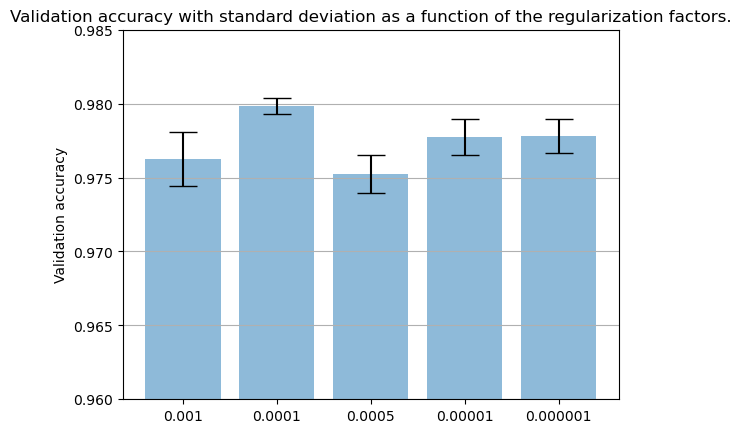

In [93]:
labels = ['0.001','0.0001','0.0005','0.00001','0.000001']
means = [mean_0_001,mean_0_0001,mean_0_0005,mean_0_00001,mean_0_000001]
stds = [std_0_001,std_0_0001,std_0_0005,std_0_00001,std_0_000001]
x_pos = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Validation accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Validation accuracy with standard deviation as a function of the regularization factors.')
ax.yaxis.grid(True)
plt.ylim([0.96,0.985])
print('Maximum accuracy is', np.max(means))


Question 3: Convolutional layers

3.1. Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe
what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

Answer:
The pooling layer is applied after the Convolutional layer and is used to reduce the dimensions of the feature map, which helps in preserving the important information or features of the input image, this reduces the computation time. Max pooling takes a set of values $S$ from the convolutional layer as input and outputs $max(s_0...s_n)$.
We need the flattened and dense layers, since this is were the actual classification takes place. The convolutional layer simply filters and transform the data.

We got 99% accuracy. 
See code below 

In [92]:
model_8 = Sequential()

#(28,28,1) equals 28x28 pixels in grayscale
model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))

model_8.add(MaxPooling2D(pool_size=(2,2)))

model_8.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model_8.add(MaxPooling2D(pool_size=(2,2)))

model_8.add(Flatten())
#A Dense layer is just a fully connected layer were a every neuron is connected to every single neuron in the layer before.
model_8.add(Dense(500, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))
model_8.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.L1(0.000001)))

model_8.add(Dense(num_classes, activation='softmax'))
model_8.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),metrics=['accuracy'],)
epochs = 40
fit_info = model_8.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
score = model_8.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 17s 36ms/step - loss: 0.4269 - accuracy: 0.8752 - val_loss: 0.1135 - val_accuracy: 0.9722
Epoch 2/40
469/469 [==============================] - 16s 35ms/step - loss: 0.1086 - accuracy: 0.9751 - val_loss: 0.0843 - val_accuracy: 0.9824
Epoch 3/40
469/469 [==============================] - 18s 38ms/step - loss: 0.0869 - accuracy: 0.9814 - val_loss: 0.0713 - val_accuracy: 0.9860
Epoch 4/40
469/469 [==============================] - 17s 37ms/step - loss: 0.0700 - accuracy: 0.9869 - val_loss: 0.0658 - val_accuracy: 0.9878
Epoch 5/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0616 - accuracy: 0.9893 - val_loss: 0.0588 - val_accuracy: 0.9888
Epoch 6/40
469/469 [==============================] - 17s 37ms/step - loss: 0.0556 - accuracy: 0.9913 - val_loss: 0.0603 - val_accuracy: 0.9889
Epoch 7/40
469/469 [==============================] - 17s 36ms/step - loss: 0.0511 - accuracy: 0.9927 - val_loss: 0.0573 - val_accuracy:

In [94]:
model_8.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_76 (Flatten)        (None, 1600)              0         
                                                                 
 dense_364 (Dense)           (None, 500)             

3.2. Discuss the differences and potential benefits of using convolutional layers over fully
connected ones for the application?

Answer:
One huge benefit is that the neurons can represent more specific features regardsless of were on the image they are located. for example the edge of a drawn number will be detected in the same way regardless of were in the full pixel space the edge is drawn. as opposed to a fully connected layer where it might not get recognized if it's to small or it exists in the the wrong part of the image.
The number of weights associated with a convolutional network is alot smaller than a fully dense one, this is good when we are working with high dimensional data such as images.
